_**DELETE BEFORE PUBLISHING**_

_This is a template also containing the style guide for use cases. The styling uses the use-case css when uploaded to the website, which will not be visible on your local machine._

_Change any text marked with {} and delete any cells marked DELETE_

***

In [5]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title">UC00147_Melbourne_Housing_Market_transformation_Multi-Dimensional_Analysis</div>

<div class="usecase-authors"><b>Authored by: Naga Nikhil Woopalanchi</b> {Author/s}</div>

<div class="usecase-duration"><b>Duration:</b> </div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b></div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, and add any more skills needed}</div>
</div>

<div class="usecase-section-header">Scenario</div>

Melbourne's housing market has experienced significant transformation between 2000 and 2016, creating challenges for policymakers, investors, and residents alike. Rising housing costs, geographic disparities in price growth, and changing neighborhood compositions have raised concerns about affordability, investment strategy, and urban development patterns. Despite extensive raw data on property transactions, there remains a lack of comprehensive analysis that integrates price trends, geographic variations, market transformation dynamics, supply-demand relationships, and transaction patterns into a coherent understanding of Melbourne's housing market evolution. This knowledge gap hampers evidence-based policy development for addressing housing affordability challenges, limits investors' ability to identify strategic opportunities, and impedes urban planners' efforts to manage neighborhood transformation effectively. This study aims to address this gap by conducting a multidimensional analysis of Melbourne's housing market data from 2000 to 2016, providing stakeholders with actionable insights into the complex dynamics shaping one of Australia's most significant property markets.

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
1. To analyze the evolution of median property prices across different property types in Melbourne from 2000 to 2016, identifying key trends and calculating compound annual growth rates.

2. To identify and quantify geographic price disparities across Melbourne's neighborhoods, determining which areas command price premiums and how these premiums vary by property type.

3. To investigate patterns of gentrification and urban transformation by analyzing changes in housing composition and price growth rates in different neighborhoods over time.

4. To assess supply-demand dynamics by calculating price elasticity with respect to transaction volumes, identifying supply-constrained areas where prices behave contrary to typical market expectations.

5. To examine the relationship between market activity (transaction volumes) and median prices over time, determining the strength and nature of this correlation.

6. To identify temporal patterns in the housing market, including hot/cold market periods, cyclical behavior, and the impact of external events on market dynamics.

7. To develop insights that can inform policy decisions regarding housing affordability, urban planning, and market intervention strategies in Melbourne.

# Introduction

The Melbourne Housing Market Analysis project investigates property price trends, urban development patterns, and market dynamics in Melbourne from 2000 to 2016. Through analysis of comprehensive housing transaction data across various property types and geographic areas, this study seeks to reveal critical insights into price growth rates, geographic disparities, market activity patterns, and supply-demand relationships. This research aims to serve multiple stakeholders: policymakers addressing housing affordability challenges, investors navigating market opportunities, and urban planners monitoring neighborhood transformation.

Our analytical framework incorporates five complementary dimensions to provide a holistic view of Melbourne's housing landscape. First, we conduct price trends analysis to track median property values over time, calculating growth rates and identifying key inflection points in the market. Second, we perform geographic price comparison to identify premium neighborhoods and quantify their relative price advantages. Third, we examine market transformation patterns by analyzing shifts in housing composition and identifying potential gentrification indicators across different areas.

The final two dimensions of our analysis focus on market mechanics and activity patterns. Through supply-demand dynamics analysis, we calculate price elasticity relative to transaction volumes, identifying areas where prices exhibit atypical behavior due to supply constraints. Our market activity analysis tracks transaction patterns over time and their correlation with price movements, revealing hot and cold market periods. These combined analytical approaches illuminate Melbourne's evolving housing landscape, documenting the widening gap between house and apartment prices, pinpointing supply-constrained neighborhoods, and tracking dramatic shifts in affordability and market composition throughout the study period.


# Importing the required Python library

In [5]:
import warnings
warnings.filterwarnings("ignore")

from io import StringIO
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 



### Import the House Prices by Small Area Sale Year Datatset

In [ ]:
# import the house prices by small area sale year datatset


base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id = 'house-prices-by-small-area-sale-year'

url = f'{base_url}{dataset_id}/exports/csv'
params = {'select': '*', 'limit': -1, 'lang': 'en', 'timezone': 'UTC'}

response = requests.get(url, params=params)

if response.status_code == 200:
    url_content = response.content.decode('utf-8')
    small_area_df = pd.read_csv(StringIO(url_content), delimiter=';')  # renaming dataset
    print(small_area_df.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

   sale_year             small_area                   type  median_price  \
0       2000                Carlton        House/Townhouse      316250.0   
1       2000                Carlton  Residential Apartment      220000.0   
2       2000         East Melbourne        House/Townhouse      622500.0   
3       2000         East Melbourne  Residential Apartment      295000.0   
4       2000             Kensington        House/Townhouse      215250.0   
5       2000        Melbourne (CBD)        House/Townhouse           NaN   
6       2000        Melbourne (CBD)  Residential Apartment      276000.0   
7       2000  Melbourne (Remainder)  Residential Apartment      284500.0   
8       2000        North Melbourne        House/Townhouse      280000.0   
9       2000              Parkville  Residential Apartment      231300.0   

   transaction_count  
0                116  
1                309  
2                 42  
3                139  
4                258  
5                  3  
6 

In [6]:
small_area_df.info() # structure of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sale_year          347 non-null    int64  
 1   small_area         340 non-null    object 
 2   type               347 non-null    object 
 3   median_price       319 non-null    float64
 4   transaction_count  347 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 13.7+ KB


### Median House Prices by Transfer Year from 2000 to 2016

In [7]:
# Median House Prices - By Type and Sale Year

base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id = 'median-house-prices-by-transfer-year-from-2000-2016'

url = f'{base_url}{dataset_id}/exports/csv'
params = {'select': '*', 'limit': -1, 'lang': 'en', 'timezone': 'UTC'}

response = requests.get(url, params=params)

if response.status_code == 200:
    url_content = response.content.decode('utf-8')
    transfer_year_df  = pd.read_csv(StringIO(url_content), delimiter=';')  # renaming dataset
    print(transfer_year_df .head(10))
else:
    print(f'Request failed with status code {response.status_code}')

   transfer_year                   type  median_price  transaction_count
0           2000        House/Townhouse      280000.0                432
1           2000  Residential Apartment      240000.0               1236
2           2002        House/Townhouse      372500.0                610
3           2002  Residential Apartment      335000.0               3506
4           2006  Residential Apartment      351250.0               3846
5           2007  Residential Apartment      381500.0               4459
6           2008        House/Townhouse      579000.0                548
7           2009  Residential Apartment      439000.0               5067
8           2010        House/Townhouse      782000.0                639
9           2011        House/Townhouse      724999.0                565


In [8]:
transfer_year_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transfer_year      34 non-null     int64  
 1   type               34 non-null     object 
 2   median_price       34 non-null     float64
 3   transaction_count  34 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ KB


# Datatset Preprocessing

## Finds Misssing Values

In [9]:
# Check for missing values
print("\nMissing values in Small Area Dataset:")
print(small_area_df.isnull().sum())
print("\nMissing values in Transfer Year Dataset:")
print(transfer_year_df.isnull().sum())


Missing values in Small Area Dataset:
sale_year             0
small_area            7
type                  0
median_price         28
transaction_count     0
dtype: int64

Missing values in Transfer Year Dataset:
transfer_year        0
type                 0
median_price         0
transaction_count    0
dtype: int64


## Hanlde Missing vlaues

In [10]:
# Fill missing values in 'small_area' with the most frequent value (mode)
small_area_df["small_area"] = small_area_df["small_area"].fillna(small_area_df["small_area"].mode()[0])

# Fill missing values in 'median_price' with the median
small_area_df["median_price"] = small_area_df["median_price"].fillna(small_area_df["median_price"].median())

# Check for missing values again
print("\nMissing values in Small Area Dataset after filling:")
print(small_area_df.isnull().sum())



Missing values in Small Area Dataset after filling:
sale_year            0
small_area           0
type                 0
median_price         0
transaction_count    0
dtype: int64


# 1. PRICE TRENDS ANALYSIS

Looking at the "Median Property Prices in Melbourne (2000-2016)" graph, there are several key insights:

1. **Diverging Price Trajectories**:
   - Houses/townhouses have seen much stronger price growth than apartments over the 16-year period

   - In 2000, the price gap was relatively small (about $50,000-75,000)

   - By 2016, houses were worth more than double the value of apartments
   
    (approximately $1.2 million vs $540,000)

2. **Growth Patterns**:
   - Houses/townhouses: 9.52% compound annual growth rate
   - Residential apartments: 5.17% compound annual growth rate
   - This significant difference (4.35 percentage points) compounds dramatically over time

3. **Market Periods**:
   - 2000-2007: Steady growth for both property types
   - 2007-2008: Acceleration in house prices
   - 2008-2010: Brief plateau/minor correction during the global financial crisis
   - 2010: Sharp jump in house prices
   - 2011-2013: Relatively flat period for both property types
   - 2013-2016: Dramatic acceleration in house prices while apartment growth remained modest

4. **Investment Implications**:
   - Houses have significantly outperformed apartments as investments
   - The dramatic acceleration from 2013-2016 for houses suggests a potential bubble formation
   - Apartment prices show more stability but much lower growth potential

5. **Supply and Demand Factors**:
   - The modest growth in apartment prices suggests increased supply may be meeting demand
   - The sharp rise in house prices indicates limited supply relative to strong demand, particularly in recent years

This divergence between house and apartment prices is particularly significant and indicates a structural shift in the Melbourne property market that accelerated after 2013, where houses became increasingly viewed as premium assets compared to apartments.



==== PRICE TRENDS ANALYSIS ====
Compound Annual Growth Rate (CAGR) from 2000 to 2016:
Houses/Townhouses: 9.52% per year
Residential Apartments: 5.17% per year


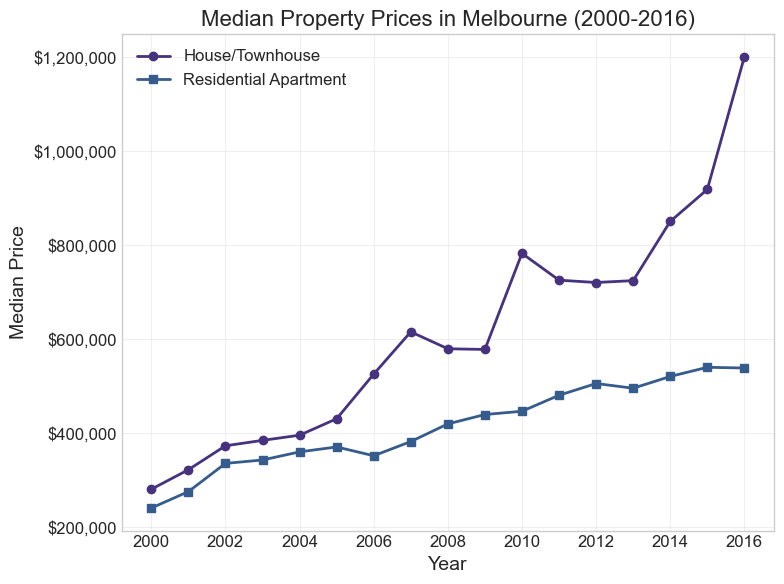

In [11]:
print("\n\n==== PRICE TRENDS ANALYSIS ====")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Set the style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12

# Group transfer year data by year and property type
price_trends = transfer_year_df.groupby(['transfer_year', 'type'])['median_price'].mean().reset_index()
price_trends_pivot = price_trends.pivot(index='transfer_year', columns='type', values='median_price')

# Calculate CAGR for each property type
def calculate_cagr(start_value, end_value, num_years):
    return (((end_value / start_value) ** (1 / num_years)) - 1) * 100

# Get the first and last years in the dataset
first_year = price_trends_pivot.index.min()
last_year = price_trends_pivot.index.max()
num_years = last_year - first_year

# Calculate CAGR for each property type
house_cagr = calculate_cagr(
    price_trends_pivot['House/Townhouse'].iloc[0],
    price_trends_pivot['House/Townhouse'].iloc[-1],
    num_years
)

apt_cagr = calculate_cagr(
    price_trends_pivot['Residential Apartment'].iloc[0],
    price_trends_pivot['Residential Apartment'].iloc[-1],
    num_years
)

print(f"Compound Annual Growth Rate (CAGR) from {first_year} to {last_year}:")
print(f"Houses/Townhouses: {house_cagr:.2f}% per year")
print(f"Residential Apartments: {apt_cagr:.2f}% per year")

# Function to format currency values
def currency_formatter(x, pos):
    return f'${x:,.0f}'

# Create a line plot for price trends
plt.figure()
plt.plot(price_trends_pivot.index, price_trends_pivot['House/Townhouse'],
         marker='o', linewidth=2, label='House/Townhouse')
plt.plot(price_trends_pivot.index, price_trends_pivot['Residential Apartment'],
         marker='s', linewidth=2, label='Residential Apartment')
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.title('Median Property Prices in Melbourne (2000-2016)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Median Price', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()


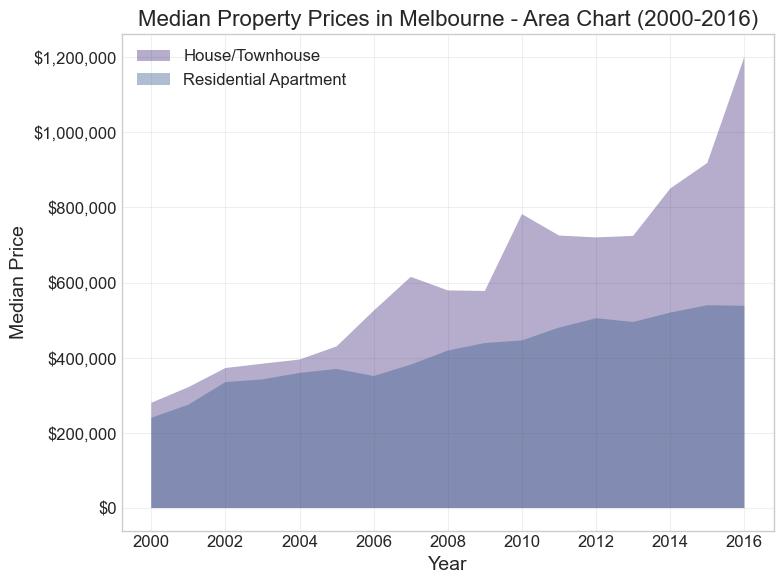

In [12]:
# Area plot showing price trends
plt.figure(figsize=(8, 6))
plt.fill_between(price_trends_pivot.index, price_trends_pivot['House/Townhouse'], alpha=0.4, label='House/Townhouse')
plt.fill_between(price_trends_pivot.index, price_trends_pivot['Residential Apartment'], alpha=0.4, label='Residential Apartment')
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.title('Median Property Prices in Melbourne - Area Chart (2000-2016)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Median Price', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

This bar chart shows the dramatic divergence in Melbourne property prices between houses and apartments from 2000 to 2016:

- In 2000, both property types had similar values (houses at $280,000, apartments at $240,000)
- By 2016, houses had skyrocketed to $1,200,000 while apartments reached only $538,000
- Houses experienced a 329% increase over the 16-year period
- Apartments grew by 124% in the same timeframe
- The gap between house and apartment prices widened significantly with each 4-year interval
- The most dramatic acceleration for houses occurred between 2012-2016, with prices jumping from $720,000 to $1,200,000 (a 67% increase in just 4 years)
- Apartment growth was more modest and consistent throughout the period

This visualization clearly illustrates how houses in Melbourne have dramatically outperformed apartments as investments, with the premium for houses growing substantially larger over time.

<Figure size 1000x1000 with 0 Axes>

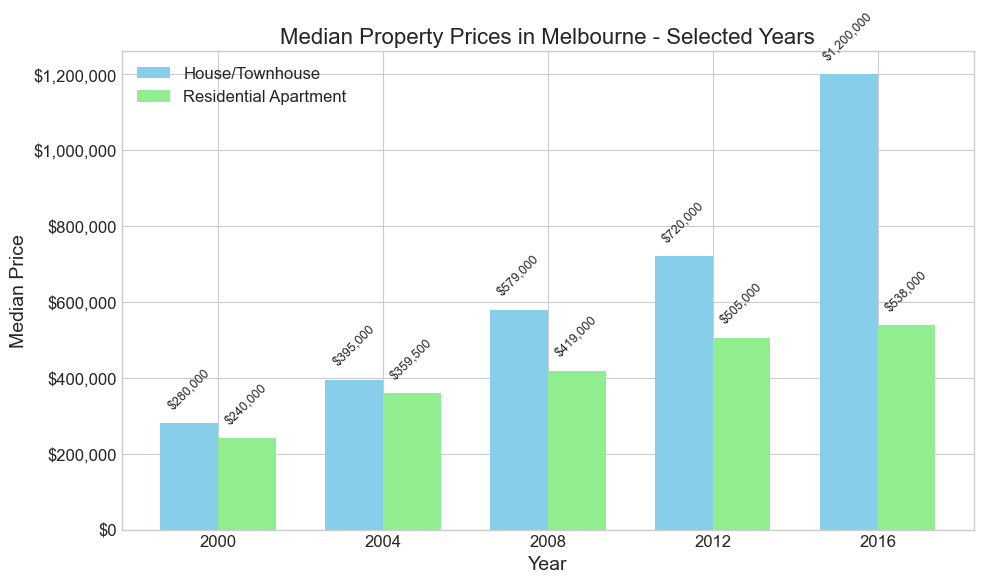

In [13]:

# Bar plot comparing prices by year
years_to_show = [2000, 2004, 2008, 2012, 2016]  # Selected years for clarity
df_selected_years = price_trends_pivot.loc[years_to_show]

plt.figure(figsize=(10, 10))
x = np.arange(len(years_to_show))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, df_selected_years['House/Townhouse'], width, label='House/Townhouse', color='skyblue')
ax.bar(x + width/2, df_selected_years['Residential Apartment'], width, label='Residential Apartment', color='lightgreen')

ax.set_xticks(x)
ax.set_xticklabels(years_to_show)
ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))
ax.set_title('Median Property Prices in Melbourne - Selected Years', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Median Price', fontsize=14)
ax.legend()

# Add value labels
for i in range(len(years_to_show)):
    house_price = df_selected_years['House/Townhouse'].iloc[i]
    apt_price = df_selected_years['Residential Apartment'].iloc[i]
    ax.text(i - width/2, house_price + 30000, f'${house_price:,.0f}', ha='center', va='bottom', fontsize=9, rotation=45)
    ax.text(i + width/2, apt_price + 30000, f'${apt_price:,.0f}', ha='center', va='bottom', fontsize=9, rotation=45)

plt.tight_layout()
plt.show()

This chart shows year-over-year price growth in Melbourne property:

- Both property types experienced volatility throughout 2000-2016
- Houses show more extreme price swings (-6% to +35%) than apartments (-5% to +22%)
- Houses had three major growth spikes: 2006 (+22%), 2010 (+35%), and 2016 (+30%)
- Apartments had their strongest growth in 2002 (+22%) but remained relatively moderate afterward
- There were brief market corrections for both property types in 2008 and 2011
- Since 2013, houses consistently outpaced apartments in growth
- By 2016, houses were surging (+30%) while apartment growth flattened to near 0%

This indicates a cyclical but increasingly divergent market, with houses showing stronger boom-bust patterns and apartments trending toward stability with diminishing returns.

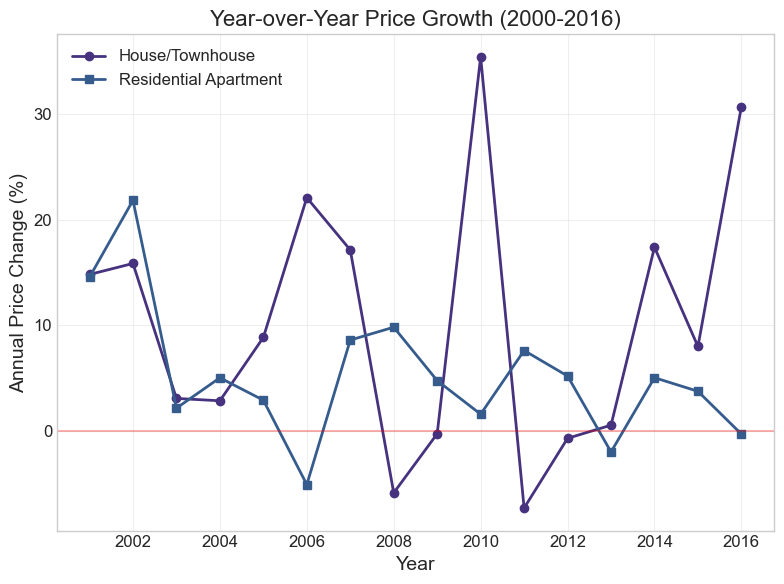

In [14]:
#  Year-over-year price growth visualization
house_pct_change = price_trends_pivot['House/Townhouse'].pct_change() * 100
apt_pct_change = price_trends_pivot['Residential Apartment'].pct_change() * 100

plt.figure(figsize=(8, 6))
plt.plot(price_trends_pivot.index[1:], house_pct_change[1:],
         marker='o', linewidth=2, label='House/Townhouse')
plt.plot(price_trends_pivot.index[1:], apt_pct_change[1:],
         marker='s', linewidth=2, label='Residential Apartment')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.title('Year-over-Year Price Growth (2000-2016)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Annual Price Change (%)', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

This chart shows the house/townhouse price premium over apartments in Melbourne from 2000-2016:

- In 2000-2005, houses commanded a modest premium of 10-17% over apartments
- Around 2006, this premium increased significantly to about 50%
- The premium fluctuated between 30-75% during 2007-2014
- 2010 shows a notable spike to approximately 75% premium
- From 2014 onward, there's a dramatic acceleration
- By 2016, houses were valued at more than 120% higher than apartments

This visualization demonstrates a fundamental shift in the Melbourne property market, with the value gap between houses and apartments widening dramatically, especially in the final years of the period. This suggests a growing preference for houses over apartments and potentially insufficient house supply compared to apartment supply in the market.

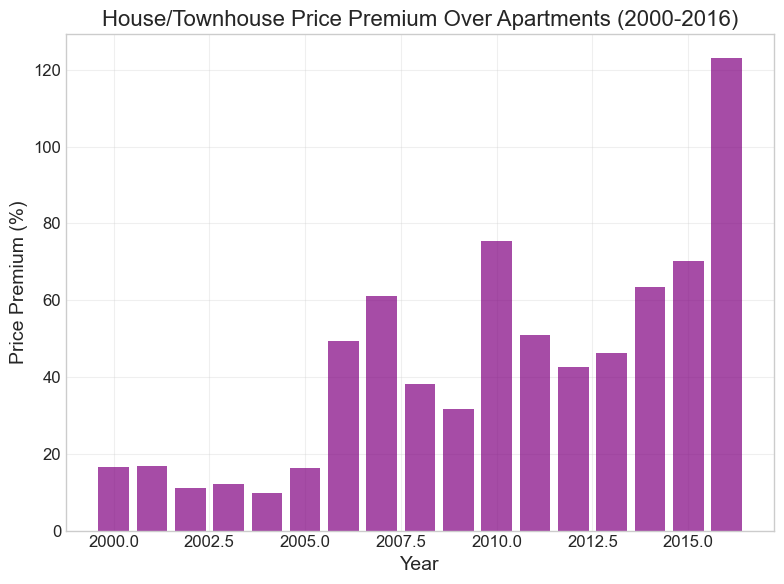

In [15]:
#  Price disparity visualization
price_disparity = (price_trends_pivot['House/Townhouse'] / price_trends_pivot['Residential Apartment'] - 1) * 100

plt.figure(figsize=(8, 6))
plt.bar(price_trends_pivot.index, price_disparity, color='purple', alpha=0.7)
plt.title('House/Townhouse Price Premium Over Apartments (2000-2016)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price Premium (%)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Melbourne's property market (2000-2016) shows houses dramatically outperforming apartments, with house prices rising 329% versus apartments' 124% growth. The house premium over apartments surged from 15% to over 120%, reflecting limited house supply against increasing apartment development. By 2016, houses were showing accelerating growth (+30% year-over-year) while apartment growth flattened to near zero, signaling a fundamental shift in relative values.